This Data Science project contains two datasets to practice exploratory data analysis (EDA) and machine learning techniques. 

The first task was to develop an algorithm that analyses the data behavior of mental illness.

To do such problem I used the following columns of the dataframe called dadosMental.csv 
- TDAH_men = Attention Deficit Hyperactivity Disorder.
- TAG_men = Threshold Assessment Grid.
- DEP_men = Depression.
- ADS_men = Adjustment Disorder/Stress Response Syndrome.
- QMSM_men = Quality Management System for Behavioral Health.

In order to produce some insights in the EDA I plotted some graphs.

Then, I applied the unsupervised k-means clustering algorithm. 

For the tasks number 2 and 3, I built-up a script for the dataset file dadosTotal.csv 
to correlate the following variables

- Exercise Frequency habit and Body mass index (IMC).
- Medicine to sleep with nutritional diet.


## Task number 1

In [36]:
#Importing the important libraries to build-up the solution.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import cufflinks as cf
from plotly.offline import plot, iplot

In [3]:
# Reading the dadosMental.csv file within a DataFrame defined as df.
df = pd.read_csv('dadosMental.csv', sep = ';')

In [4]:
# Trying to get the first knowledge about this dataframe.
df.head()

,name,gender,email,document,birth,state_add,postal_code_add,extra_add,street_add,number_add,...,QMSM_level_men,redFlag_men,globalScoreRate_men,DEP_level_men,affraidTerribleHappening_men,ADS_level_men,updateContactPhone_men,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,#0001,feminino,#1000,#1111,05/09/1991,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0.73,NaN,False,critico,NaN,NaN,NaN,NaN
1,#0002,feminino,#1001,#1112,19/01/1986,NaN,NaN,NaN,NaN,NaN,...,moderado,1,0.47,critico,False,moderado,NaN,NaN,NaN,NaN
2,#0003,feminino,#1002,#1113,28/09/1976,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#0004,masculino,#1003,#1114,08/12/1987,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.93,moderado,NaN,NaN,NaN,NaN,NaN,NaN
4,#0005,feminino,#1004,#1115,22/04/1989,NaN,NaN,NaN,NaN,NaN,...,moderado,1,0.53,moderado,NaN,NaN,70826192.0,NaN,NaN,NaN


In [5]:
#Using the method info to see the general information given by the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   name                                    110 non-null    object 
 1   gender                                  110 non-null    object 
 2   email                                   110 non-null    object 
 3   document                                110 non-null    object 
 4   birth                                   110 non-null    object 
 5   state_add                               0 non-null      float64
 6   postal_code_add                         0 non-null      float64
 7   extra_add                               0 non-null      float64
 8   street_add                              0 non-null      float64
 9   number_add                              0 non-null      float64
 10  locality_add                            0 non-null      float6

In [6]:
#I'm going to look only at the columns of interest.
cols_of_interest = ['TDAH_men', 'TAG_men', 'DEP_men', 'ADS_men', 'QMSM_men']
df1 = df[cols_of_interest]
# TDAH_men = Attention Deficit Hyperactivity Disorder.
# TAG_men = Threshold Assessment Grid.
# DEP_men = Depression.
# ADS_men = Adjustment Disorder/Stress Response Syndrome.
# QMSM_men = Quality Management System for Behavioral Health.

In [7]:
df1.head()

,TDAH_men,TAG_men,DEP_men,ADS_men,QMSM_men
0,2,1,0,5,0
1,6,3,3,2,2
2,3,0,0,0,0
3,0,0,2,0,0
4,4,4,2,0,3


In [8]:
# I can do my first analysis with the method describe.
df1.describe()

,TDAH_men,TAG_men,DEP_men,ADS_men,QMSM_men
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,2.209091,1.645455,1.209091,0.763636,1.518182
std,1.954038,1.840355,1.586037,1.514016,1.618312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,2.000000
max,6.000000,6.000000,5.000000,6.000000,6.000000


## Some remarks

- As one can see there is a total of 110 persons that were examined. All of the mental illness were evaluated, and a scale was defined going from 0 (without the issue) to 6 (serious problems). The mean value and the standard deviation for each of them are given as follows: TDAH_men = 2.209091 and 1.954038; TAG_men = 1.645455 and 1.840355; DEP_men = 1.209091 and 1.586037; ADS_men = 0.763636 and 1.514016; QMSM_men = 1.518182 and 1.618312. Therefore, the most proeminent illness is TDAH.

In [9]:
# Trying to find the NaN values in the dataframe. 
df1.isnull().any()

TDAH_men    False
TAG_men     False
DEP_men     False
ADS_men     False
QMSM_men    False
dtype: bool

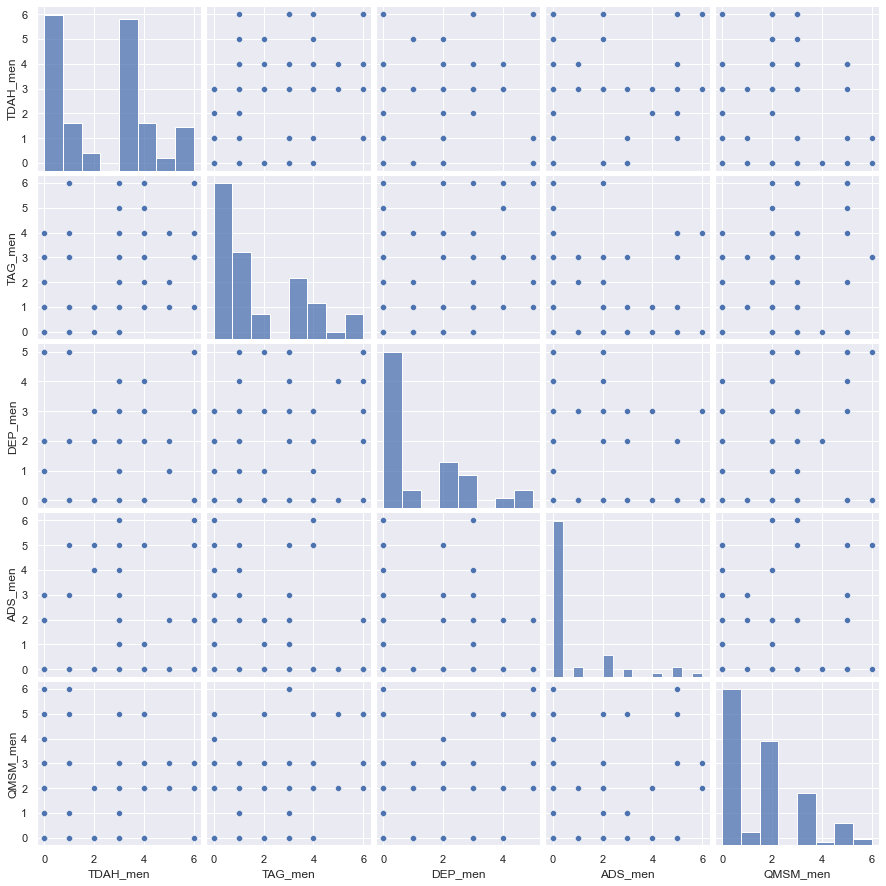

In [10]:
# Here I decided to use seaborn library in order to see clearly the 
# correlation of the variables.
sns.pairplot(df1 , palette='bwr')

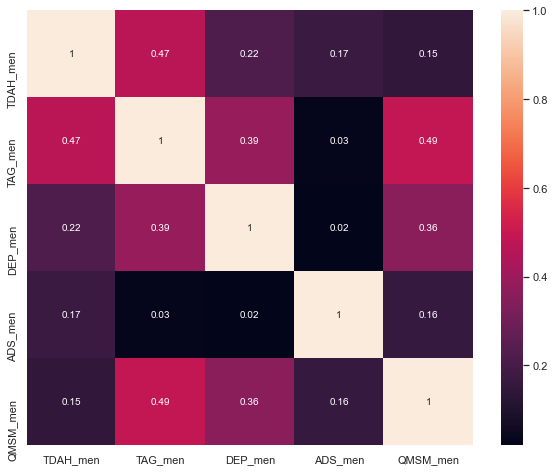

In [11]:
# The heat map is always a good plot if we intend to find
# in a quantitative way the correlation among the variables.
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr().round(decimals=2), annot=True)
plt.show()

- As one can observe there are some correlations between the illness TDAH - TAG, DEP - QMSM and TAG - QMSM

In [12]:
cf.go_offline()

In [13]:
df['TDAH_men'].iplot(kind='hist')

In [14]:
df['TAG_men'].iplot(kind='hist')

In [16]:
df['DEP_men'].iplot(kind='hist')

In [17]:
df['ADS_men'].iplot(kind='hist')

In [18]:
df['QMSM_men'].iplot(kind='hist')

In [19]:
# I imported the pandas_profiling in order to have a complete
# statistics overview of the dataframe.
import pandas_profiling

In [20]:
pandas_profiling.ProfileReport(df1)

In [21]:
profile = pandas_profiling.ProfileReport(df1)

In [22]:
profile.to_file("report_task_1.html")

## Remark

- The histograms and the report give us an interesting fact, most of people has in some level TDAH problems. Also, ADS and DEP are not so diagnosed compared to the other illness.

## Machine Learning algorithm

In [34]:
# Importing the PyCaret library
from pycaret.clustering import *

In [24]:
# 95% of the dataframe are responsible for training and testing the model
data = df1.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df1.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (104, 5)
Unseen Data For Predictions: (6, 5)


In [25]:
exp_clu101 = setup(data, normalize = True,session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(104, 5)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(104, 33)"
9,CPU Jobs,-1


In [26]:
# Creating the k-means clustering model. 
# The scores are given as
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1302,11.5242,2.3592,0,0,0


- The silhouette defines a measure of how close each point in one cluster is to points in the neighboring clusters.

- The Calinski-Harabasz is the ratio between the within-cluster dispersion and the between-cluster dispersion.

- The Davies-Bouldin is the measure of the average similarity of each cluster with its most similar cluster.

In [27]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [28]:
kmodes = create_model('kmodes', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1244,7.8749,2.2328,0,0,0


In [29]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x000001FBB0D58040>, init='Cao',
       max_iter=100, n_clusters=5, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


In [30]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,TDAH_men,TAG_men,DEP_men,ADS_men,QMSM_men,Cluster
0,5,1,2,2,2,Cluster 2
1,4,1,0,0,2,Cluster 2
2,3,1,0,0,2,Cluster 2
3,3,5,4,0,2,Cluster 2
4,0,0,0,0,0,Cluster 3


In [31]:
# Trying to observe the behavior of the clusters.
plot_model(kmeans)

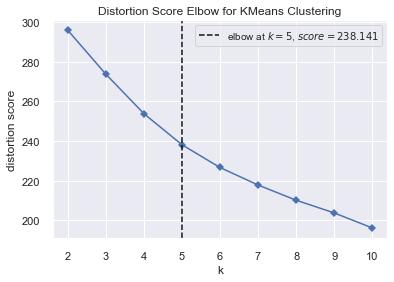

In [37]:
# Discovering the best k for optimizing the model.
plot_model(kmeans, plot = 'elbow')

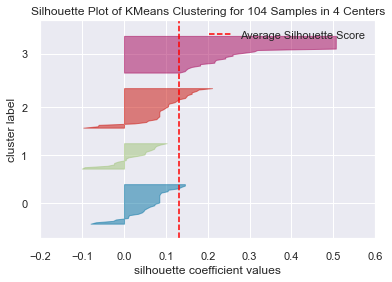

In [38]:
# The cluster number 3 was the best classified.
plot_model(kmeans, plot = 'silhouette')

In [39]:
#to see the amount of persons in each clusters
plot_model(kmeans, plot = 'distribution') 

In [40]:
# For each mental illness I decided to see the total amount of persons
# belonging to one of the clusters using the measure of their illness as a reference.
plot_model(kmeans, plot = 'distribution', feature = 'TDAH_men')

- For instance, in the plot above one can readily observe that 23 persons of cluster number 3, 8 persons of cluster number 2, 2 persons of cluster number 1 and one person of cluster number 0 don't have TDAH. The same analysis can be done either for the other TDAH levels or for the other mental illness below. 

In [41]:
plot_model(kmeans, plot = 'distribution', feature = 'TAG_men')

In [42]:
plot_model(kmeans, plot = 'distribution', feature = 'DEP_men')

In [43]:
plot_model(kmeans, plot = 'distribution', feature = 'ADS_men')

In [44]:
plot_model(kmeans, plot = 'distribution', feature = 'QMSM_men')

In [45]:
# It's time to validate the model with unseen data.
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,TDAH_men,TAG_men,DEP_men,ADS_men,QMSM_men,Cluster
0,5,4,1,0,2,Cluster 2
1,1,6,5,0,3,Cluster 1
2,3,0,0,1,0,Cluster 0
3,3,2,0,0,0,Cluster 0
4,0,0,2,3,0,Cluster 3


In [46]:
save_model(kmeans,'Final Kmeans Model 09Feb2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [47]:
saved_kmeans = load_model('Final Kmeans Model 09Feb2022')

Transformation Pipeline and Model Successfully Loaded


In [48]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [49]:
new_prediction.head()

,TDAH_men,TAG_men,DEP_men,ADS_men,QMSM_men,Cluster
0,5,4,1,0,2,Cluster 2
1,1,6,5,0,3,Cluster 1
2,3,0,0,1,0,Cluster 0
3,3,2,0,0,0,Cluster 0
4,0,0,2,3,0,Cluster 3


 Note that the results of unseen_predictions and new_prediction are identical.

## Task number 2

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
# Reading the dadosTotal.csv file within a DataFrame defined as df.
df = pd.read_csv('dadosTotal.csv', encoding='latin-1', sep = ';')

In [52]:
# Trying to get the first knowledge about this dataframe.
df.head()

,name,gender,email,document,birth,state_add,postal_code_add,extra_add,street_add,number_add,...,P8_level_phy,highFatPercentage_phy,userDidCheckup_hea,weigth_first_hea,weigth_actual_hea,height_hea,imc_hea,weight_hea,question_hea,status_hea
0,#00001,feminino,#01000,#02000,05/09/1991,SC,NaN,NaN,Las Ramblas,1201,...,moderado,NaN,False,70.0,70.0,180.0,21.60,70.0,NaN,NaN
1,#00002,feminino,#01001,#02001,19/01/1986,SC,NaN,NaN,La plata,25,...,moderado,NaN,False,80.0,80.0,180.0,24.69,80.0,NaN,NaN
2,#00003,feminino,#01002,#02002,28/09/1976,SC,NaN,no,Toscana,24,...,moderado,NaN,False,52.0,52.0,161.0,20.06,52.0,NaN,NaN
3,#00004,masculino,#01003,#02003,14/09/1987,SC,NaN,condominio san telmo,Bibosi,71,...,moderado,NaN,False,80.0,80.0,175.0,26.12,80.0,NaN,NaN
4,#00005,feminino,#01004,#02004,08/03/1985,LP,NaN,NaN,Av PerifÃ©rica,133,...,NaN,NaN,False,59.0,59.0,168.0,20.90,59.0,NaN,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 221 entries, name to status_hea
dtypes: bool(1), float64(44), object(176)
memory usage: 180.7+ KB


In [54]:
# An attempt to find null values in this huge dataframe.
df.isnull().sum()

name              0
gender            0
email             0
document          0
birth             0
               ... 
height_hea        4
imc_hea           4
weight_hea        4
question_hea    105
status_hea      105
Length: 221, dtype: int64

In [55]:
# To accomplish task number 2, I'm going to look
# only at the columns of interest.
cols_of_interest = ['exerciseFrequency_hab', 'imc_hea']
df1 = df[cols_of_interest]

In [56]:
# Making the same procedure as before.
df1.head()

,exerciseFrequency_hab,imc_hea
0,3-6DaysOnWeek,21.60
1,none,24.69
2,3-6DaysOnWeek,20.06
3,none,26.12
4,1-2DaysOnWeek,20.90


In [57]:
display(df1)

,exerciseFrequency_hab,imc_hea
0,3-6DaysOnWeek,21.60
1,none,24.69
2,3-6DaysOnWeek,20.06
3,none,26.12
4,1-2DaysOnWeek,20.90
...,...,...
100,NaN,20.82
101,NaN,NaN
102,allDays,19.23
103,3-6DaysOnWeek,21.36


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   exerciseFrequency_hab  99 non-null     object 
 1   imc_hea                101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [59]:
# Here, I decided to redefine the labels for exercise frequency
df1.loc[df1["exerciseFrequency_hab"] == "none", "exerciseFrequency_hab"] = 0
df1.loc[df1["exerciseFrequency_hab"] == "1-2DaysOnWeek", "exerciseFrequency_hab"] = 1
df1.loc[df1["exerciseFrequency_hab"] == "3-6DaysOnWeek", "exerciseFrequency_hab"] = 2
df1.loc[df1["exerciseFrequency_hab"] == "allDays", "exerciseFrequency_hab"] = 3

In [60]:
# The collumn "exerciseFrequency_hab" is still an object-type. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   exerciseFrequency_hab  99 non-null     object 
 1   imc_hea                101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [61]:
df1.head()

,exerciseFrequency_hab,imc_hea
0,2,21.60
1,0,24.69
2,2,20.06
3,0,26.12
4,1,20.90


In [62]:
display(df1)

,exerciseFrequency_hab,imc_hea
0,2,21.60
1,0,24.69
2,2,20.06
3,0,26.12
4,1,20.90
...,...,...
100,NaN,20.82
101,NaN,NaN
102,3,19.23
103,2,21.36


In [63]:
# Removing the null values
df2 = df1.drop([100, 101])

In [64]:
# Converting object-string type to float-type 
df2['exerciseFrequency_hab'].astype(str).astype(float)

0      2.0
1      0.0
2      2.0
3      0.0
4      1.0
      ... 
98     0.0
99     1.0
102    3.0
103    2.0
104    2.0
Name: exerciseFrequency_hab, Length: 103, dtype: float64

In [65]:
df['imc_hea'].iplot(kind='hist')

In [66]:
df['exerciseFrequency_hab'].iplot(kind='hist')

## Some comments

- From the IMC histogram, as one can observe, there is an outlier result where one person has an IMC higher than 40. This result can occur, however, it's pretty much rare. The amount of 40 persons was perfectly split between IMC (20-21,99) and (24-25,99) columns. Also, we may consider that 57 persons have good results for IMC. 

- From the "exerciseFrequency_hab" histogram, there are 58 persons who practice exercises during a week. The other 41 are sedentary and confirmed the higher IMC viewed in the first plot.

Text(0, 0.5, 'Body mass index')

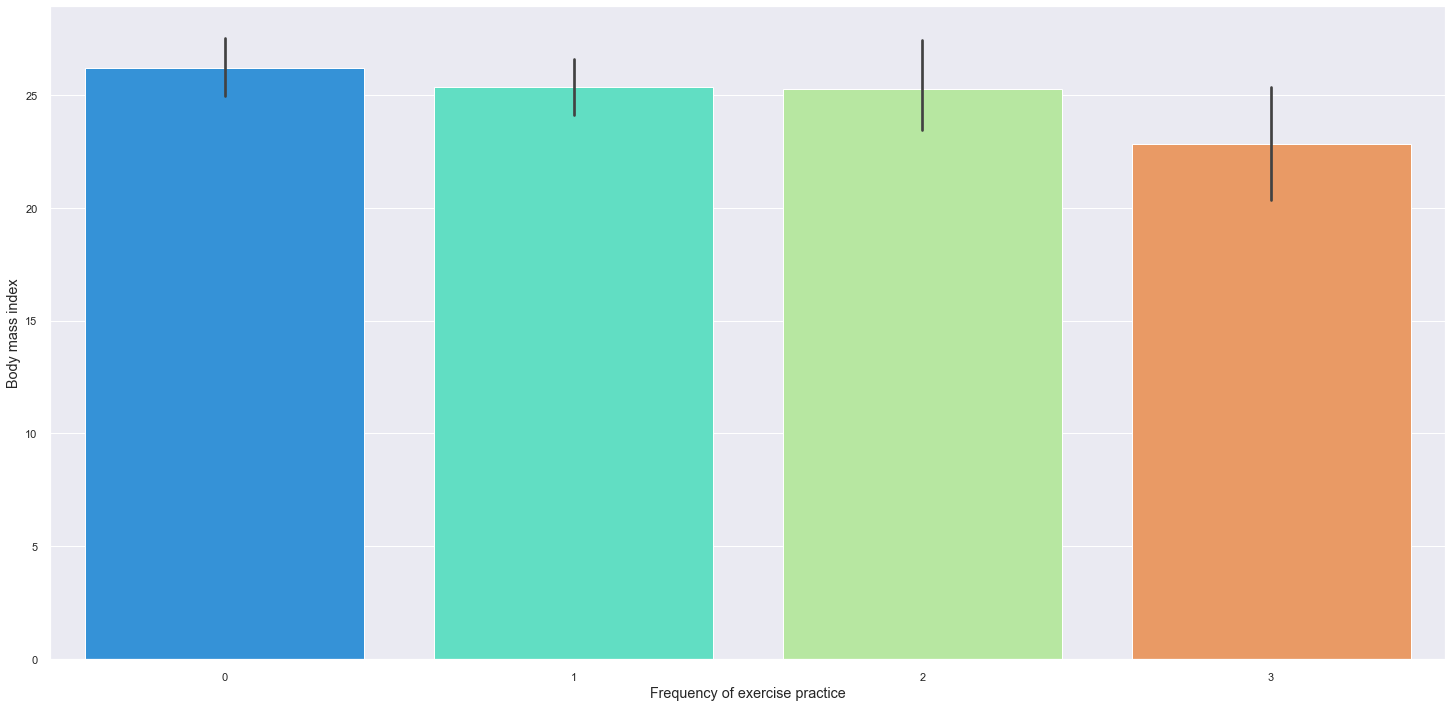

In [67]:
# Here, one can observe the relation among the variables.
fig3, ax3 = plt.subplots(1,1,figsize=(25,12))
sns.barplot(data=df2,
     x='exerciseFrequency_hab',y='imc_hea',palette='rainbow')
ax3.set_xlabel('Frequency of exercise practice',size='x-large')
ax3.set_ylabel('Body mass index', size='x-large')

## One single remark

- From column number 3 in the plot above, I readily confirmed that those who practice exercises more often have less IMC level.

In [68]:
df2.describe()

,imc_hea
count,100.000000
mean,25.492300
std,4.239005
min,18.370000
25%,22.067500
50%,25.500000
75%,27.937500
max,43.750000


## Final comments for the task number 2

- By using the method df2.describe above, it is possible to see that the mean IMC value for the provided data is 25.49 with a standard deviation of 4.23, which means that the majority of persons are inside of an acceptable range of IMC.

## Task number 3

In [69]:
# Reading again the dadosTotal.csv file within a DataFrame defined as df.
df = pd.read_csv('dadosTotal.csv', encoding='UTF-8', sep = ';')

In [70]:
for col in df.columns:
    print(col)

name
gender
email
document
birth
state_add
postal_code_add
extra_add
street_add
number_add
locality_add
district_add
medicines_fir
typeBlood_fir
donateBlood_fir
donateOrgan_fir
degreeOfEducation_fir
colorSkin_fir
civilStatus_fir
haveKidsLivingWith_fir
covid_fir
highPressure_fir
problemHeart_fir
colesterolHigh_fir
diabete_fir
respiratoryDiseases_fir
cancer_fir
nivelSatisfacao_fir
vidaSatisfacao_fir
covidSymptoms_fir
medicineForPressure_fir
lowHealth_fir
depressionOrAnxiety_fir
psychoContact_fir
diabeteType_fir
typeCancer_fir
medicalTreatment_fir
whichSupplement_hab
checkupFrequency_hab
smoke_hab
exerciseFrequency_hab
supplement_hab
kindOfDiet_hab
sunExposure_hab
workModel_hab
fatProtetores_hab
religionPractices_hab
hobbiesPractice_hab
havePet_hab
socialization_hab
doPee_hab
peeAppearance_hab
headacheAndBackache_hab
workSittingMoreThen6HoursPerDay_hab
howLongSmoke_hab
howMuchSmoke_hab
stopToSmoke_hab
iKnowWhichDoctor_hab
biologicalSex_his
pregnancy_his
frequencyOfWomanExams_his
takeHormo

In [71]:
# From now on I'm interested on the following columns
# 1)medicineToSleep_sle, 2)kindOfProtein_nut,
# 3)frequencyOfProtein_nut, 4)frequencyOfSausage_nut,
# 5)numberOfMeals_nut, 6) oliveOil_nut,
# 7)waterFrequency_nut, 8)fruits_nut
# 9)fruitJuice_nut, 10)friedFood_nut
# 11)fastFood_nut
cols_of_interest = ['medicineToSleep_sle', 'kindOfProtein_nut', 'frequencyOfProtein_nut','frequencyOfSausage_nut',
                    'numberOfMeals_nut','oliveOil_nut','waterFrequency_nut','fruits_nut','fruitJuice_nut',
                   'friedFood_nut','fastFood_nut']
df1 = df[cols_of_interest]

In [72]:
# Geting the first knowledge of the dataframe.
display(df1)

,medicineToSleep_sle,kindOfProtein_nut,frequencyOfProtein_nut,frequencyOfSausage_nut,numberOfMeals_nut,oliveOil_nut,waterFrequency_nut,fruits_nut,fruitJuice_nut,friedFood_nut,fastFood_nut
0,Não,Carne bovina,3x por dia,2x por semana,5,Até 1 colher de sobremesa por dia,entre 2 e 3 litros,2 porções por dia,Mais de 2x por semana,Mais de 1x por mês,Mais de 1x por mês
1,Não,Carne de frango,3x por dia,2x por semana,4,Até 1 colher de sobremesa por dia,1 litro ou menos,Raramente,Raramente,Mais de 1x por mês,Mais de 1x por mês
2,Não,Carne de frango,3x por dia,4x por semana ou mais,3,Até 1 colher de sobremesa por dia,entre 2 e 3 litros,2 porções por dia,Raramente,Mais de 1x por mês,Mais de 1x por mês
3,Não,Carne bovina,4x por dia ou mais,1x por semana ou nenhuma,2,Raramente,1 litro ou menos,Raramente,Raramente,Mais de 1x por mês,Mais de 1x por mês
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,"Sim, por conta própria",Carne de porco,3x por dia,3x por semana,3,Até 1 colher de sobremesa por dia,entre 2 e 3 litros,Raramente,Mais de 2x por semana,Mais de 1x por mês,Mais de 1x por mês
103,Não,Ovos,4x por dia ou mais,2x por semana,4,Até 1 colher de sobremesa por dia,entre 1 e 2 litros,1 porção por dia,Mais de 2x por semana,Mais de 1x por mês,Mais de 1x por mês


In [73]:
# Trying to see the kind of protein eaten more often. 
df1.groupby('kindOfProtein_nut').kindOfProtein_nut.count()

kindOfProtein_nut
Carne bovina        62
Carne de frango     21
Carne de porco       2
Ovos                 7
Peixe                1
Proteína Vegetal     4
Name: kindOfProtein_nut, dtype: int64

In [74]:
df1.groupby('medicineToSleep_sle').medicineToSleep_sle.count()

medicineToSleep_sle
Não                           84
Sim, com prescrição médica     8
Sim, por conta própria         3
Name: medicineToSleep_sle, dtype: int64

- As one can observe above, 84 people don't take any medicine to sleep. And, therefore, I decided to remove them in order to study the relations among persons who take some medicine and the other variables.

In [75]:
df1 = df1.drop(df[df['medicineToSleep_sle'] == 'Não'].index, axis="rows")

In [76]:
# Here, I redefined the variables of the column "medicineToSleep_sle"
df1.loc[df1["medicineToSleep_sle"] == "Sim, com prescrição médica", "medicineToSleep_sle"] = 1
df1.loc[df1["medicineToSleep_sle"] == "Sim, por conta própria", "medicineToSleep_sle"] = 2

In [77]:
display(df1)

,medicineToSleep_sle,kindOfProtein_nut,frequencyOfProtein_nut,frequencyOfSausage_nut,numberOfMeals_nut,oliveOil_nut,waterFrequency_nut,fruits_nut,fruitJuice_nut,friedFood_nut,fastFood_nut
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,Carne bovina,1x por dia ou nenhuma,1x por semana ou nenhuma,2,Raramente,1 litro ou menos,Raramente,Mais de 2x por semana,Mais de 1x por mês,Mais de 1x por mês
20,1,Ovos,2x por dia,1x por semana ou nenhuma,1,Raramente,entre 1 e 2 litros,1 porção por dia,Até 2x por semana,Raramente,Mais de 1x por mês
24,1,Carne de frango,2x por dia,3x por semana,3,Até 1 colher de sobremesa por dia,entre 2 e 3 litros,Raramente,Até 2x por semana,Raramente,Mais de 1x por mês
28,1,Carne de frango,2x por dia,1x por semana ou nenhuma,5,Raramente,1 litro ou menos,1 porção por dia,Mais de 2x por semana,Mais de 1x por mês,Mais de 1x por mês
39,NaN,Carne bovina,3x por dia,3x por semana,5,Raramente,entre 1 e 2 litros,Raramente,Até 2x por semana,Mais de 1x por mês,Mais de 1x por mês
41,2,Carne bovina,1x por dia ou nenhuma,4x por semana ou mais,3,Raramente,entre 1 e 2 litros,2 porções por dia,Mais de 2x por semana,Raramente,Raramente
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,1,Carne bovina,2x por dia,3x por semana,3,Raramente,1 litro ou menos,Raramente,Mais de 2x por semana,Mais de 1x por mês,Mais de 1x por mês


In [78]:
df1.groupby('medicineToSleep_sle').medicineToSleep_sle.count()

medicineToSleep_sle
1    8
2    3
Name: medicineToSleep_sle, dtype: int64

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 4 to 102
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   medicineToSleep_sle     11 non-null     object
 1   kindOfProtein_nut       13 non-null     object
 2   frequencyOfProtein_nut  13 non-null     object
 3   frequencyOfSausage_nut  13 non-null     object
 4   numberOfMeals_nut       13 non-null     object
 5   oliveOil_nut            13 non-null     object
 6   waterFrequency_nut      13 non-null     object
 7   fruits_nut              13 non-null     object
 8   fruitJuice_nut          13 non-null     object
 9   friedFood_nut           13 non-null     object
 10  fastFood_nut            13 non-null     object
dtypes: object(11)
memory usage: 2.0+ KB


In [80]:
df1.isnull().sum()

medicineToSleep_sle       10
kindOfProtein_nut          8
frequencyOfProtein_nut     8
frequencyOfSausage_nut     8
numberOfMeals_nut          8
oliveOil_nut               8
waterFrequency_nut         8
fruits_nut                 8
fruitJuice_nut             8
friedFood_nut              8
fastFood_nut               8
dtype: int64

In [81]:
# Removing the null values of the column "medicineToSleep_sle"
df1.dropna(subset = ["medicineToSleep_sle"], inplace=True)

In [82]:
df1.isnull().sum()

medicineToSleep_sle       0
kindOfProtein_nut         0
frequencyOfProtein_nut    0
frequencyOfSausage_nut    0
numberOfMeals_nut         0
oliveOil_nut              0
waterFrequency_nut        0
fruits_nut                0
fruitJuice_nut            0
friedFood_nut             0
fastFood_nut              0
dtype: int64

In [83]:
df1.describe()

,medicineToSleep_sle,kindOfProtein_nut,frequencyOfProtein_nut,frequencyOfSausage_nut,numberOfMeals_nut,oliveOil_nut,waterFrequency_nut,fruits_nut,fruitJuice_nut,friedFood_nut,fastFood_nut
count,11,11,11,11,11,11,11,11,11,11,11
unique,2,4,4,3,5,2,3,4,3,2,3
top,1,Carne bovina,2x por dia,3x por semana,3,Raramente,1 litro ou menos,Raramente,Mais de 2x por semana,Raramente,Mais de 1x por mês
freq,8,6,5,5,6,8,5,6,5,6,9


- It is important to mention that from the table displayed above the preferred protein is beef (carne bovina) which is consumed regularly 2 times per day. The water frequency is something to be improved, most of the persons drink it poorly.

## Some plots

In [84]:
df1['fastFood_nut'].iplot(kind='hist')

- One may see that 9 of 11 persons with problems sleeping eat fast food more than once a mounth.

Text(0, 0.5, 'Medicine to sleep')

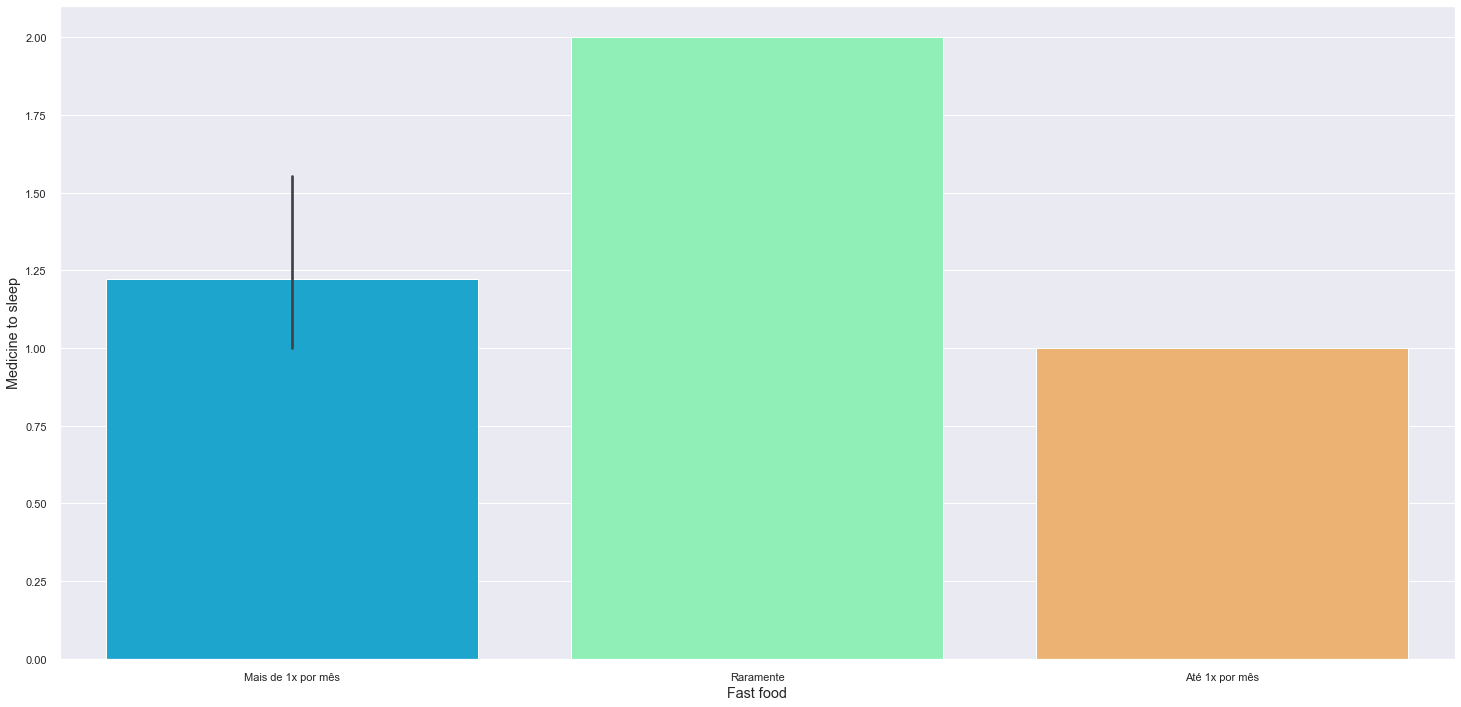

In [85]:
# Here, one can observe the relation among the variables.
# Let me remind the reader that 1 on the y axis is for those 
# who ask for a prescription and 2 is for those who don't.
fig3, ax3 = plt.subplots(1,1,figsize=(25,12))
sns.barplot(data=df1,
     y='medicineToSleep_sle',x='fastFood_nut',palette='rainbow')
ax3.set_xlabel('Fast food',size='x-large')
ax3.set_ylabel('Medicine to sleep', size='x-large')

- From the plot above, it can be inferred that fast food is consumed by people who ask for a prescription from a doctor.

In [86]:
df1['waterFrequency_nut'].iplot(kind='hist')

In [87]:
df1['numberOfMeals_nut'].iplot(kind='hist')

- More than half have 3 meals per day.

Text(0, 0.5, 'Medicine to sleep')

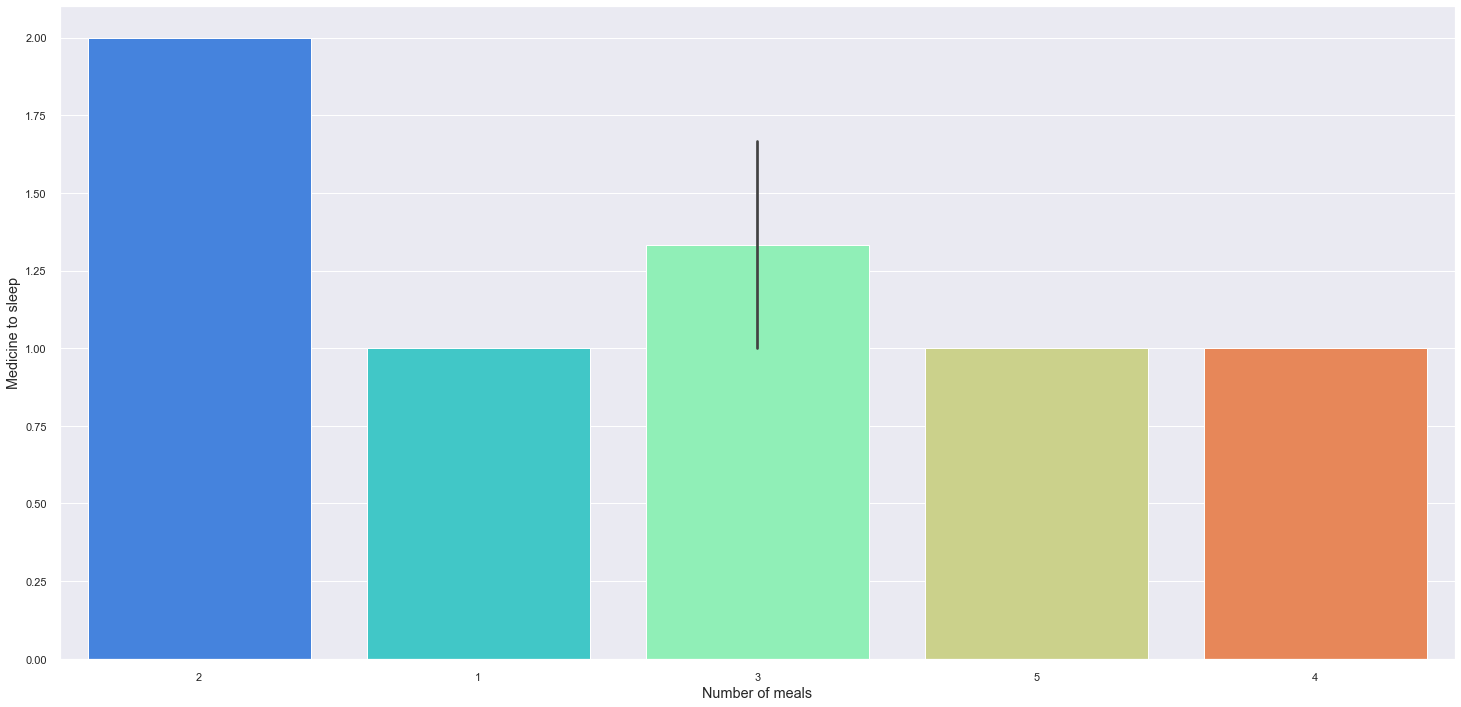

In [88]:
fig3, ax3 = plt.subplots(1,1,figsize=(25,12))
sns.barplot(data=df1,
     y='medicineToSleep_sle',x='numberOfMeals_nut',palette='rainbow')
ax3.set_xlabel('Number of meals',size='x-large')
ax3.set_ylabel('Medicine to sleep', size='x-large')

- In order to have a full report, I decided to use the pandas_profiling.

In [89]:
import pandas_profiling

In [90]:
pandas_profiling.ProfileReport(df1)

In [91]:
profile = pandas_profiling.ProfileReport(df1)

In [92]:
profile.to_file("report_medicine.html")

## Final remarks

- From task number 3, I would suggest the patients reduce their fast food consumption and improve the consumption of drinking water.